<a href="https://colab.research.google.com/github/ColdCoffee21/Foundations-of-Data-Science/blob/master/Inference_from_Heart_Disease_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load the Heart Disease dataset

In [ ]:
df = pd.read_csv(r"C:\Users\dheer\Documents\6th Sem\POML\Codes\heart.csv")

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().sum().sum()

0

## 2. Therefore the dataset does not have missing values. Therefore, deleting random cells

In [ ]:
for col in df.columns:
    if(col != "target"):
        df.loc[df.sample(frac=0.03).index, col] = np.nan

In [ ]:
df.isnull().sum()

age         9
sex         9
cp          9
trestbps    9
chol        9
fbs         9
restecg     9
thalach     9
exang       9
oldpeak     9
slope       9
ca          9
thal        9
target      0
dtype: int64

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37.0,1.0,2.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57.0,0.0,0.0,120.0,NaN,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0


## Now there are randomly null values in the dataset

## 3. Fill the missing values with the mode

In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57.0,0.0,0.0,120.0,240.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0


## 4.Compute the following statistics of all the features:

### i) Mean

In [ ]:
df.mean()

age          54.607261
sex           0.693069
cp            0.963696
trestbps    131.805281
chol        245.686469
fbs           0.148515
restecg       0.541254
thalach     149.772277
exang         0.320132
oldpeak       1.033333
slope         1.386139
ca            0.712871
thal          2.300330
target        0.544554
dtype: float64

### ii) Median

In [ ]:
df.median()

age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

### iii) Mode

In [ ]:
df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,56.0,1.0,0.0,130.0,240.0,0.0,1.0,153.0,0.0,0.0,1.0,0.0,2.0,1


### iv) Range

In [ ]:
df.max() - df.min()

age          48.0
sex           1.0
cp            3.0
trestbps    106.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     131.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

### v) Inter quartile Range

In [ ]:
df.quantile(.75) - df.quantile(.25) 

age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        61.5
fbs          0.0
restecg      1.0
thalach     29.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64

### vi) Standard Deviation

In [ ]:
df.std()

age          8.844174
sex          0.461983
cp           1.014140
trestbps    17.347396
chol        50.771766
fbs          0.356198
restecg      0.524986
thalach     22.643456
exang        0.467299
oldpeak      1.148528
slope        0.603033
ca           1.019706
thal         0.602616
target       0.498835
dtype: float64

## 5.Partition  the given dataset into mutually exclusive and exhaustive subsets of records based on the class labels

In [ ]:
df['target'].unique()

array([1, 0], dtype=int64)

### So we will partition the dataset into two partitions, D0 and D1

In [ ]:
d0 = df[df['target'] == 0]
d1 = df[df['target'] == 1]

In [ ]:
d0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,2.0,0
166,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,3.0,0
167,62.0,0.0,0.0,140.0,268.0,0.0,0.0,160.0,0.0,3.6,0.0,2.0,2.0,0
168,63.0,1.0,0.0,130.0,254.0,0.0,0.0,147.0,0.0,1.4,1.0,1.0,2.0,0
169,53.0,1.0,0.0,140.0,203.0,1.0,1.0,155.0,1.0,3.1,0.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0


In [ ]:
d0['target'].unique()

array([0], dtype=int64)

In [ ]:
d1['target'].unique()

array([1], dtype=int64)

## 6.Compute the following statistics (as in 4) of all the features of all the partitions created in step-5:

### For d0

In [ ]:
d0.mean()

age          56.746377
sex           0.826087
cp            0.500000
trestbps    134.427536
chol        250.528986
fbs           0.159420
restecg       0.463768
thalach     139.797101
exang         0.543478
oldpeak       1.562319
slope         1.166667
ca            1.137681
thal          2.514493
target        0.000000
dtype: float64

In [ ]:
d0.median()

age          58.0
sex           1.0
cp            0.0
trestbps    130.0
chol        249.0
fbs           0.0
restecg       0.0
thalach     143.0
exang         1.0
oldpeak       1.2
slope         1.0
ca            1.0
thal          3.0
target        0.0
dtype: float64

In [ ]:
d0.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,130.0,212.0,0.0,0.0,132.0,1.0,0.0,1.0,0.0,3.0,0.0
1,NaN,NaN,NaN,NaN,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
d0.max() - d0.min()

age          42.0
sex           1.0
cp            3.0
trestbps    100.0
chol        278.0
fbs           1.0
restecg       2.0
thalach     124.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        0.0
dtype: float64

In [ ]:
d0.quantile(.75) - d0.quantile(.25) 

age          9.750
sex          0.000
cp           1.000
trestbps    24.250
chol        64.750
fbs          0.000
restecg      1.000
thalach     31.000
exang        1.000
oldpeak      1.875
slope        0.000
ca           2.000
thal         1.000
target       0.000
dtype: float64

In [ ]:
d0.std()

age          7.744140
sex          0.380416
cp           0.906183
trestbps    18.579043
chol        48.530853
fbs          0.367401
restecg      0.542492
thalach     22.556712
exang        0.499921
oldpeak      1.289497
slope        0.548167
ca           1.047709
thal         0.685997
target       0.000000
dtype: float64

### For d1

In [ ]:
d1.mean()

age          52.818182
sex           0.581818
cp            1.351515
trestbps    129.612121
chol        241.636364
fbs           0.139394
restecg       0.606061
thalach     158.115152
exang         0.133333
oldpeak       0.590909
slope         1.569697
ca            0.357576
thal          2.121212
target        1.000000
dtype: float64

In [ ]:
d1.median()

age          53.0
sex           1.0
cp            1.0
trestbps    130.0
chol        236.0
fbs           0.0
restecg       1.0
thalach     160.0
exang         0.0
oldpeak       0.2
slope         2.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [ ]:
d1.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,56.0,1.0,2.0,130.0,240.0,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1


In [ ]:
d1.max() - d1.min()

age          47.0
sex           1.0
cp            3.0
trestbps     86.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     106.0
exang         1.0
oldpeak       4.2
slope         2.0
ca            4.0
thal          3.0
target        0.0
dtype: float64

In [ ]:
d1.quantile(.75) - d1.quantile(.25) 

age         14.0
sex          1.0
cp           1.0
trestbps    20.0
chol        56.0
fbs          0.0
restecg      1.0
thalach     23.0
exang        0.0
oldpeak      1.0
slope        1.0
ca           0.0
thal         0.0
target       0.0
dtype: float64

In [ ]:
d1.std()

age          9.320364
sex          0.494762
cp           0.935780
trestbps    15.974289
chol        52.375065
fbs          0.347412
restecg      0.502396
thalach     19.114675
exang        0.340969
oldpeak      0.779526
slope        0.586684
ca           0.847892
thal         0.452471
target       0.000000
dtype: float64

## 7. Give your comments or inference by comparing the statistics obtained in step-4 and 6.

Comparision of the partitions and the whole dataset has been done below for the various features and statistical measures respectively.

In [ ]:
for tmp in df.columns:
    if(d1.mean()[tmp] > d0.mean()[tmp]):
        print("partition 1 has higher average", tmp)
    else:
        print("partition 0 has higher average", tmp)
    if (d1.median()[tmp] > d0.median()[tmp]):
        print("partition 1 has higher median for", tmp)
    else:
        print("partition 0 has higher median for", tmp)
    if (d1.std()[tmp] > d0.std()[tmp]):
        print("partition 1 has higher std for", tmp)
    else:
        print("partition 0 has higher std for", tmp)
print("")

partition 0 has higher average age
partition 0 has higher median for age
partition 1 has higher std for age
partition 0 has higher average sex
partition 0 has higher median for sex
partition 1 has higher std for sex
partition 1 has higher average cp
partition 1 has higher median for cp
partition 1 has higher std for cp
partition 0 has higher average trestbps
partition 0 has higher median for trestbps
partition 0 has higher std for trestbps
partition 0 has higher average chol
partition 0 has higher median for chol
partition 1 has higher std for chol
partition 0 has higher average fbs
partition 0 has higher median for fbs
partition 0 has higher std for fbs
partition 1 has higher average restecg
partition 1 has higher median for restecg
partition 0 has higher std for restecg
partition 1 has higher average thalach
partition 1 has higher median for thalach
partition 0 has higher std for thalach
partition 0 has higher average exang
partition 0 has higher median for exang
partition 0 has high

In [ ]:
for tmp in df.columns:
    if(d1.mean()[tmp] > df.mean()[tmp]):
        print("partition 1 has higher average", tmp)
    else:
        print("The whole dataset has higher average", tmp)
    if (d1.median()[tmp] > df.median()[tmp]):
        print("partition 1 has higher median for", tmp)
    else:
        print("The whole dataset has higher median for", tmp)
    if (d1.std()[tmp] > df.std()[tmp]):
        print("partition 1 has higher std for", tmp)
    else:
        print("The whole dataset has higher std for", tmp)
print("")

The whole dataset has higher average age
The whole dataset has higher median for age
partition 1 has higher std for age
The whole dataset has higher average sex
The whole dataset has higher median for sex
partition 1 has higher std for sex
partition 1 has higher average cp
The whole dataset has higher median for cp
The whole dataset has higher std for cp
The whole dataset has higher average trestbps
The whole dataset has higher median for trestbps
The whole dataset has higher std for trestbps
The whole dataset has higher average chol
The whole dataset has higher median for chol
partition 1 has higher std for chol
The whole dataset has higher average fbs
The whole dataset has higher median for fbs
The whole dataset has higher std for fbs
partition 1 has higher average restecg
The whole dataset has higher median for restecg
The whole dataset has higher std for restecg
partition 1 has higher average thalach
partition 1 has higher median for thalach
The whole dataset has higher std for tha

In [ ]:
for tmp in df.columns:
    if(d0.mean()[tmp] > df.mean()[tmp]):
        print("partition 1 has higher average", tmp)
    else:
        print("The whole dataset has higher average", tmp)
    if (d0.median()[tmp] > df.median()[tmp]):
        print("partition 1 has higher median for", tmp)
    else:
        print("The whole dataset has higher median for", tmp)
    if (d0.std()[tmp] > df.std()[tmp]):
        print("partition 1 has higher std for", tmp)
    else:
        print("The whole dataset has higher std for", tmp)
print("")

partition 1 has higher average age
partition 1 has higher median for age
The whole dataset has higher std for age
partition 1 has higher average sex
The whole dataset has higher median for sex
The whole dataset has higher std for sex
The whole dataset has higher average cp
The whole dataset has higher median for cp
The whole dataset has higher std for cp
partition 1 has higher average trestbps
The whole dataset has higher median for trestbps
partition 1 has higher std for trestbps
partition 1 has higher average chol
partition 1 has higher median for chol
The whole dataset has higher std for chol
partition 1 has higher average fbs
The whole dataset has higher median for fbs
partition 1 has higher std for fbs
The whole dataset has higher average restecg
The whole dataset has higher median for restecg
partition 1 has higher std for restecg
The whole dataset has higher average thalach
The whole dataset has higher median for thalach
The whole dataset has higher std for thalach
partition 1 h

## 8. Construct a line plots using the plot style ‘ggplot’

### 9. Use appropriate X axis, y axis labels, title, and Legend (bottom right) for the graph generated

### 10. Give your inferences from plots constructed in step-8

In [ ]:
import seaborn as sns

In [ ]:
plt.style.use('ggplot')

### Attribute definition to help infer from the plots 

Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
1 = typical angina
2 = atypical angina
3 = non — anginal pain
4 = asymptotic

Age: displays the age of the individual.

Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

Thal : displays the thalassemia :
1 = normal
2 = fixed defect
3 = reversible defect

Sex: displays the gender of the individual using the following format :
1 = male
0 = female

#### Age vs CP

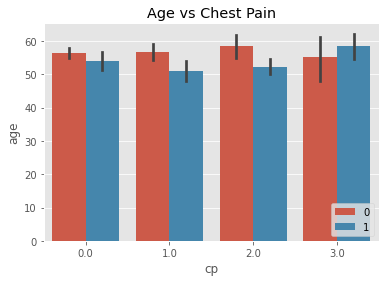

In [ ]:
#plt.figure(figsize = (20,6))
sns.barplot(x=df.cp, y=df.age,data=df, hue = df['target'])
plt.title("Age vs Chest Pain")
plt.legend(loc ="lower right")
plt.show()

### For chest pain types 0,1 and 2 heart disease diagnosed patients are younger while for chest pain type 3 diagnosed patients are older.

#### CP vs chol

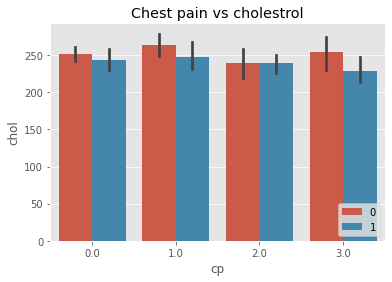

In [ ]:
sns.barplot(x=df.cp, y=df.chol,data=df, hue = df['target'])
plt.title("Chest pain vs cholestrol")
plt.legend(loc ="lower right")
plt.show()

### For chest pain types 0,1 and 3 diagnosed patients have lesser cholestrol while for chest pain type 2 cholestrol is higher for diagnosed patients.

#### Age vs thal

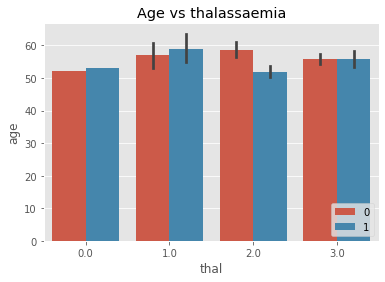

In [ ]:
#plt.figure(figsize = (20,6))
sns.barplot(y=df.age, x=df.thal,data=df,hue = df['target'])
plt.title("Age vs thalassaemia")
plt.legend(loc ="lower right")
plt.show()

### Here, we can infer that
#### thal type 0 occurs at avg age of 52 for both diagnosed and undiagnosed patients
#### thal type 1 occurs at avg age of 55 for both diagnosed and undiagnosed patients, with a higher variance of maximum on diagnosed patients.
#### thal type 2 occurs at avg age of 50-60 for both diagnosed and undiagnosed patients where undiagnosed patients have an highest avg age of 60.
#### thal type 3 occurs at avg age of 55 for both diagnosed and undiagnosed patients where it is almost equal.

#### Sex vs CP

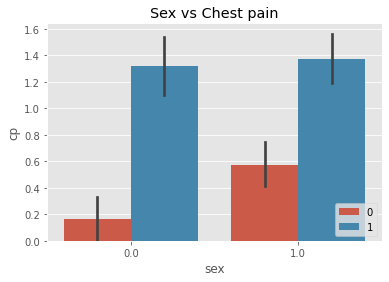

In [ ]:
sns.barplot(x=df.sex, y=df.cp,data=df,hue = df['target'])
plt.title("Sex vs Chest pain")
plt.legend(loc ="lower right")
plt.show()

### Diagnosed males and females have cp type 1 and higher, which is increasing levels of angina. Undiagnosed males and females mostly have cp type 0, which is asymptomatic